(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Missing values:
survived         0
pclass           0
sex      

/tmp/ipython-input-580309032.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-580309032.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

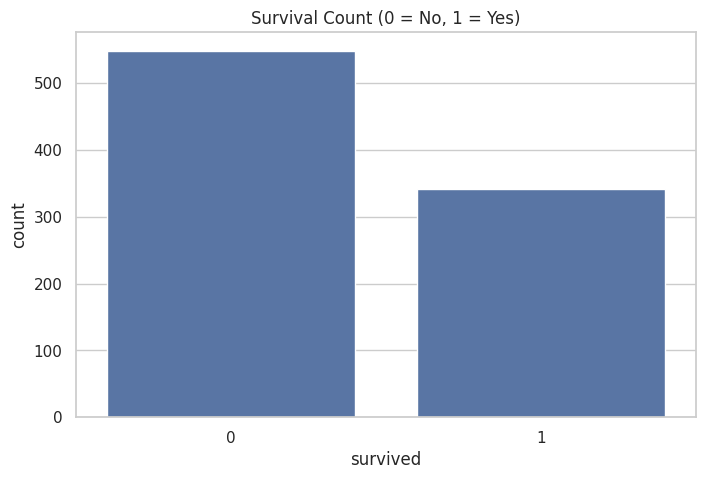

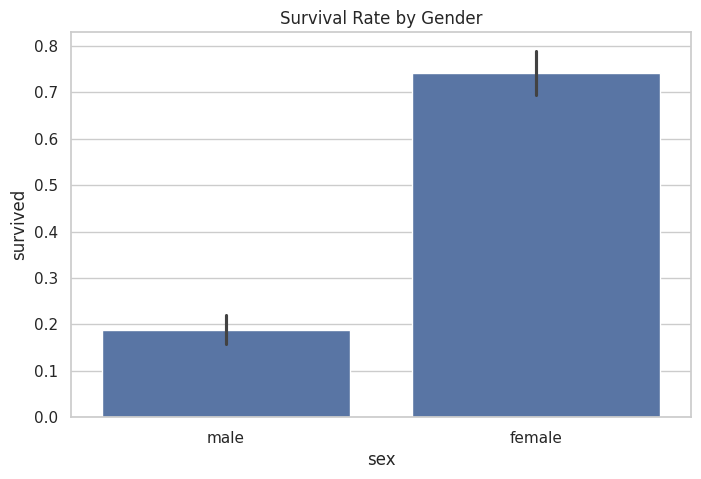

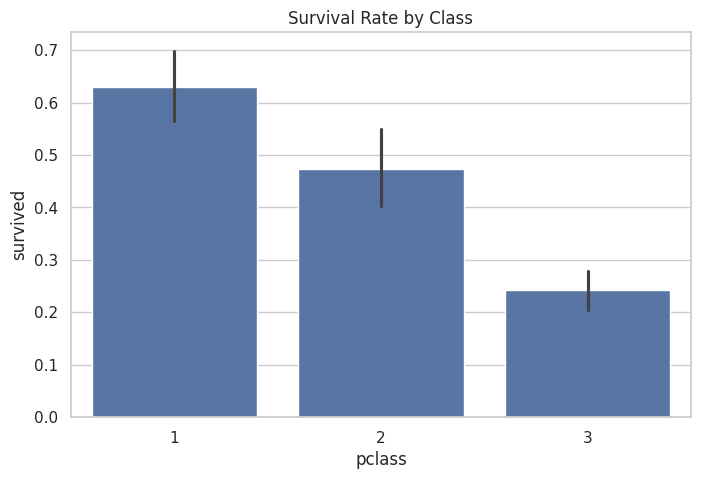

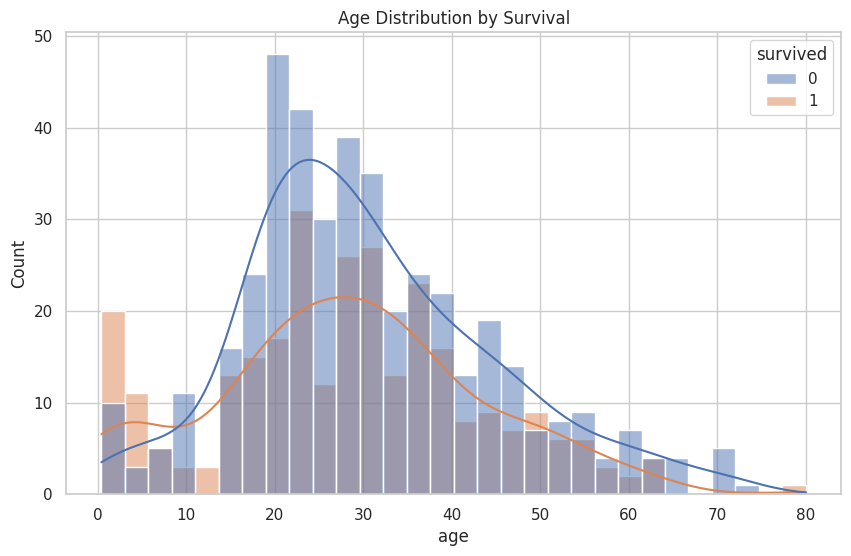

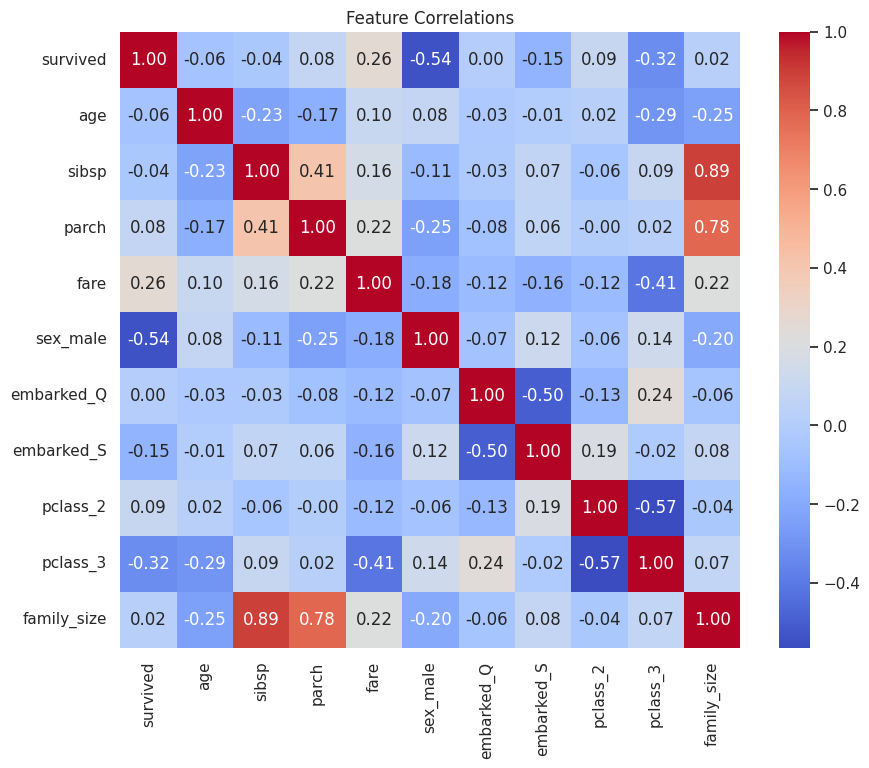

Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [5]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

sns.set(style="whitegrid")

# Load the dataset
df = sns.load_dataset('titanic')

# Preview
print(df.shape)
df.head()

# Basic info and missing values
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Data Cleaning

# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' (too many missing) and other unnecessary columns
df.drop(['deck', 'alive', 'class', 'who', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, columns=['sex', 'embarked', 'pclass'], drop_first=True)

df.head()

# Exploratory Visualizations

# Survival rate overall
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', data=sns.load_dataset('titanic'))  # using original for labels
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Survival by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='survived', data=sns.load_dataset('titanic'))
plt.title('Survival Rate by Gender')
plt.show()

# Survival by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=sns.load_dataset('titanic'))
plt.title('Survival Rate by Class')
plt.show()

# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=sns.load_dataset('titanic'), x='age', hue='survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

# Feature Engineering (optional but good)
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

# Simple ML Model

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

